In [1]:
%matplotlib inline
%autosave 120
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import seaborn as sns
from math import sqrt
from math import trunc
sns.set(style="ticks")

Autosaving every 120 seconds


In [2]:
import time
start_time=time.time()

In [3]:
#Define functions
def randn():
    return np.random.normal()
def rand():
    return np.random.uniform(0,1)
def cm(j):
    if j<(0.5*ITER):
        return 0.5
    elif j<(0.75*ITER):
        return 0.15
    else:
        return 0.05
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return trunc(stepper * number) / stepper

In [4]:
#Import and Rename Data
data=pd.read_csv("data.csv")
data.columns=["ExpShearSS","ExpStressSS","Other"]

In [5]:
#Initial Guesses
Mu0c = 0.00645468906131364
MuINFc = 0.00316706382891868
TauC = .0351797011418833
Sigy0 = 0.0020498850301406
tr1 = 0.70951493191527
tr2 = 0.111778944141652
a = 1     #1.0644714293727 #NOTE: USING CONSTANT VALUE FOR A
MuR = 0.0216741984005847
m = 1.5
d = 0.5 #NOTE: USING CONSTANT VALUE FOR D

#Computational Values
ITER = 1000
ERBEST = 10000
n = len(data.ExpShearSS)

In [6]:
for j in range(ITER):
    MULT=cm(j)#Defines Mult
    
    #Assigning NEW Variable Values
    Mu0cNEW = (sqrt(Mu0c) + MULT*.1*(.5 - rand()))**2
    MuINFcNEW = (sqrt(MuINFc) + MULT*(.5 - rand()))**2
    Sigy0NEW = (sqrt(Sigy0) + MULT*.1*(.5 - rand()))**2
    tr1NEW = (sqrt(tr1) + MULT*(.5 - rand()))**2
    tr2NEW = (sqrt(tr2) + MULT*.1*(.5 - rand()))**2
    TauCNEW = (sqrt(TauC) + MULT*(.5 - rand()))**2
    MuRNEW = (sqrt(MuR) + MULT*(.5 - rand()))**2
    
    #Calculate Structure / Stress Contributions, and Total Stress
    LambdaSS = (tr2NEW * data.ExpShearSS ** d + 1)/(tr1NEW * data.ExpShearSS ** a + tr2NEW * data.ExpShearSS ** d + 1)
    SigmaR = LambdaSS * Sigy0NEW + MuRNEW * data.ExpShearSS * LambdaSS ** m
    SigmaVISC = data.ExpShearSS * (((Mu0cNEW - MuINFcNEW)/(1 + TauCNEW * data.ExpShearSS)) * MuINFcNEW)
    SigmaTOT = SigmaR + SigmaVISC
    
    #Calculate Error
    ERROR=0
    for i in range (n):
        ERROR += ((SigmaTOT[i] - data.ExpStressSS[i])/(data.ExpStressSS[i])) ** 2
    s=(sqrt(ERROR)/n)
    
    #If New Best Error, Save Values
    if s < ERBEST:
        ERBEST = s;
        Mu0c = Mu0cNEW;
        MuINFc = MuINFcNEW;
        Sigy0 = Sigy0NEW;
        tr1 = tr1NEW;
        tr2 = tr2NEW;
        TauC = TauCNEW;
        MuR = MuRNEW;
        SigmaRBEST = SigmaR;
        SigmaVISCBEST = SigmaVISC;
        SigmaBEST = SigmaTOT;
        ViscRBEST = SigmaR/data.ExpShearSS;
        ViscTOT = SigmaBEST/data.ExpShearSS;
        LambdaBEST = LambdaSS;
print(ERBEST)

0.05705414271192051


In [7]:
print("--- %s seconds ---" % (truncate(time.time() - start_time,5))) #wow, it is significantly slower than matlab and mathematica
print("--- %s seconds per iteration ---" % (truncate(((time.time() - start_time)/ITER),5)))

--- 6.23379 seconds ---
--- 0.00623 seconds per iteration ---


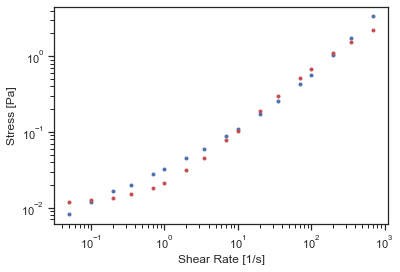

In [8]:
fig, ax = plt.subplots()
ax.loglog(data.ExpShearSS,data.ExpStressSS, 'b.')
ax.loglog(data.ExpShearSS, SigmaRBEST, 'r.')
ax.loglog(data.ExpShearSS, SigmaVISCBEST, 'g.')

ax.set(xlabel='Shear Rate [1/s]',ylabel='Stress [Pa]')

plt.show()

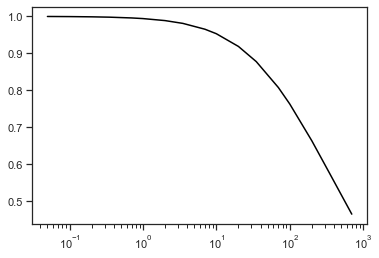

In [9]:
plt.semilogx(data.ExpShearSS, LambdaBEST,'black')
plt.show()